# Assignment HPO MNIST digits Ruben Tak

Try to train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data()).

Optimize hyperparameters using the sklearn wrapper (not Talos)
Basic approach: (max score 55)

Optimize for LR, number of nodes per layer and number of hidden layers
Advanced approach (max score 90):

Basic + Batch normalization, different topologies, different learnig algorithms, etc
Reporting (10 points): chart the correlation between accuracies and the different hyper parameters, histograms, line plots, etc (you will have to implement some code for this)

Try adding all the bells and whistles—save checkpoints, use early stopping, hyperparameter tunning,...
Use 70%, 20% and 10% as splits

## Project structure

1. Load and preprocess the MNIST dataset
2. Define the MLP architecture and compile the model.
3. Train the model on the training set and validate it on the validation set.
4. Optimize hyperparameters using the sklearn wrapper.
5. Evaluate the model on the test set and report the performance metric.
6. Implement checkpoints and early stopping to save the best model.
7. Plot hyperparameters vs the accuracies obtained for different hyperparameters.
8. Implement batch normalization, different topologies, and different learning algorithms to achieve better results.
9. Tune hyperparameters again with these additions and compare the results.
10. Report the final observations and analysis of the pipeline.

In [99]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization

In [90]:
# load the dataset
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

##  Data preprocessing

In [92]:
# Load the dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# Split the dataset into train, validation and test sets

val_size = int(X_train_full.shape[0] * 0.2)  # 20%
test_size = int(X_train_full.shape[0] * 0.1)  # 10%
train_size = X_train_full.shape[0] - val_size - test_size  # 70%

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_train_full, y_train_full, train_size=train_size, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (val_size + test_size), random_state=42)

In [93]:
# Reshape and normalize the input images
X_train = X_train.reshape(-1, 784) / 255.0
X_val = X_val.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# One-hot encode the target vector
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Print the shape of the resulting preprocessed data
print("Training set shape: ", X_train.shape, y_train.shape)
print("Validation set shape: ", X_val.shape, y_val.shape)
print("Test set shape: ", X_test.shape, y_test.shape)

Training set shape:  (42000, 784) (42000, 10)
Validation set shape:  (12000, 784) (12000, 10)
Test set shape:  (6000, 784) (6000, 10)


##  MLP architecture and compile the model

In [100]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(nodes=64, layers=1, lr=0.01, optimizer='adam', batch_norm=False):
    model = Sequential()
    for i in range(layers):
        model.add(Dense(nodes, activation='relu', input_shape=(784,)))
        if batch_norm:
            model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'adam':
        opt = Adam(lr=lr)
    elif optimizer == 'sgd':
        opt = SGD(lr=lr)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the MLP model with default hyperparameters
model = create_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [101]:
# Define class names
class_names = [str(i) for i in range(10)]
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


##  Train the model on the training set and validate it on the validation set

In [102]:
# Train the model on the training set
first_model = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2765 - accuracy: 0.9177 - val_loss: 0.1995 - val_accuracy: 0.9382
Epoch 2/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1797 - accuracy: 0.9483 - val_loss: 0.1869 - val_accuracy: 0.9459
Epoch 3/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1519 - accuracy: 0.9564 - val_loss: 0.1791 - val_accuracy: 0.9503
Epoch 4/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1318 - accuracy: 0.9626 - val_loss: 0.1955 - val_accuracy: 0.9533
Epoch 5/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1243 - accuracy: 0.9649 - val_loss: 0.1944 - val_accuracy: 0.9520
Epoch 6/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1176 - accuracy: 0.9663 - val_loss: 0.2302 - val_accuracy: 0.9503
Epoch 7/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1134 - accuracy: 0.9678 - val_loss: 0.2092 - val_accuracy:

## Visualize the training and validation accuracy

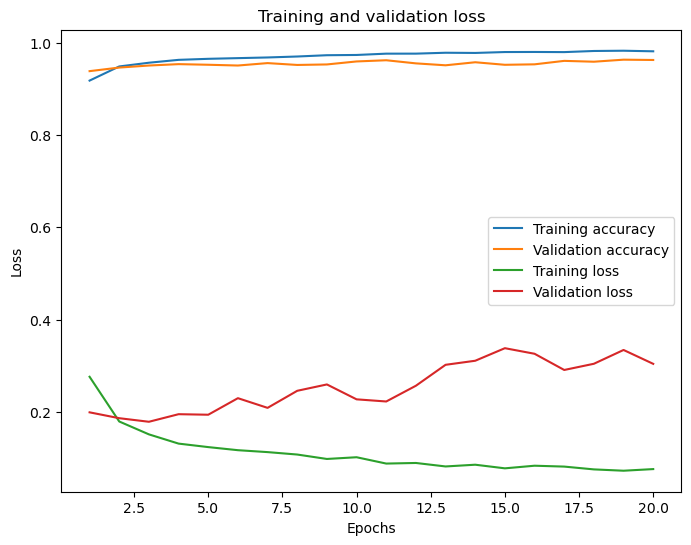

In [103]:
# Evaluate the model on the test set
def plot_model(model):
    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # create single figure
    plt.figure(figsize=(8,6))

    # plot accuracy
    plt.plot(epochs, acc, label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation accuracy')

    # plot loss
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')

    # set labels
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # show plot
    plt.show()

# Plot the training and validation metrics
plot_model(first_model)

##  Optimize hyperparameters using the sklearn wrapper

In [104]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'nodes': [32, 64, 128],
    'layers': [1, 2, 3],
    'lr': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'sgd'],
    'batch_norm': [True, False]
}

# Create the MLP model with default hyperparameters
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32)

# Use GridSearchCV to optimize hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/var/folders/gc/pq01pgrs2gjf3zqjxcb9p1j80000gn/T/ipykernel_19611/1995020885.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32)
/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/ericta

Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
875/875 [==============================] - 4s 3ms/step - loss: 1.3967 - accuracy: 0.5671
Epoch 2/20
875/875 [==============================] - 4s 3ms/step - loss: 0.4537 - accuracy: 0.8745
Epoch 2/20
875/875 [==============================] - 4s 3ms/step - loss: 0.3710 - accuracy: 0.8913
Epoch 2/20
875/875 [==============================] - 4s 3ms/step - loss: 0.4425 - accuracy: 0.8780
Epoch 2/20
875/875 [==============================] - 4s 3ms/step - loss: 0.4675 - accuracy: 0.8714
Epoch 2/20
875/875 [==============================] - 4s 3ms/step - loss: 1.2074 - accuracy: 0.6232
Epoch 2/20
875/875 [==============================] - 3s 3ms/step - loss: 0.8488 - accuracy: 0.7735
Epoch 3/20
875/875 [==============================] - 3s 3ms/step - loss: 0.7908 - accuracy: 0.7934
Epoch 3/20
875/875 [==============================] - 3s 3ms/step - loss: 0.8166 - accuracy: 0.7862
E

/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


192/875 [=====>........................] - ETA: 2s - loss: 0.5548 - accuracy: 0.8366

/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


179/875 [=====>........................] - ETA: 3s - loss: 0.5881 - accuracy: 0.8218Epoch 1/20
Epoch 1/20
240/875 [=======>......................] - ETA: 2s - loss: 0.5097 - accuracy: 0.8499

/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


  1/875 [..............................] - ETA: 6:56 - loss: 3.0567 - accuracy: 0.1250

/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


875/875 [==============================] - 3s 3ms/step - loss: 1.2604 - accuracy: 0.6081
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 0.3102 - accuracy: 0.9107
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 0.3231 - accuracy: 0.9042
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 1.1161 - accuracy: 0.6519
Epoch 2/20
875/875 [==============================] - 4s 3ms/step - loss: 0.3212 - accuracy: 0.9054
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 1.0861 - accuracy: 0.6544
Epoch 2/20
875/875 [==============================] - 3s 3ms/step - loss: 0.6752 - accuracy: 0.8137
Epoch 3/20
875/875 [==============================] - 4s 4ms/step - loss: 1.0358 - accuracy: 0.6811
Epoch 2/20
875/875 [==============================] - 3s 4ms/step - loss: 0.6761 - accuracy: 0.8159
Epoch 3/20
875/875 [==============================] - 4s 4ms/step - loss: 0.3441 - accuracy: 0.8973
Epoch 2/20


/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


875/875 [==============================] - 3s 3ms/step - loss: 0.0689 - accuracy: 0.9778
Epoch 20/20
438/438 [==============================] - 2s 3ms/step - loss: 0.2158 - accuracy: 0.9371
Epoch 1/20
875/875 [==============================] - 4s 4ms/step - loss: 0.3507 - accuracy: 0.8935
Epoch 2/20
 88/875 [==>...........................] - ETA: 2s - loss: 0.5556 - accuracy: 0.8310

/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


183/875 [=====>........................] - ETA: 2s - loss: 0.4485 - accuracy: 0.8591

/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


875/875 [==============================] - 3s 3ms/step - loss: 0.6251 - accuracy: 0.8247
Epoch 2/20
875/875 [==============================] - 3s 3ms/step - loss: 0.2223 - accuracy: 0.9333
Epoch 3/20
875/875 [==============================] - 3s 3ms/step - loss: 0.6511 - accuracy: 0.8207
Epoch 2/20
875/875 [==============================] - 4s 3ms/step - loss: 0.3056 - accuracy: 0.9065
Epoch 2/20
875/875 [==============================] - 3s 3ms/step - loss: 0.5515 - accuracy: 0.8409
Epoch 2/20
875/875 [==============================] - 4s 3ms/step - loss: 0.3215 - accuracy: 0.9035
Epoch 2/20
875/875 [==============================] - 3s 3ms/step - loss: 0.5376 - accuracy: 0.8445
Epoch 2/20
875/875 [==============================] - 3s 3ms/step - loss: 0.3644 - accuracy: 0.8980
Epoch 3/20
875/875 [==============================] - 3s 3ms/step - loss: 0.1842 - accuracy: 0.9449
Epoch 4/20
875/875 [==============================] - 3s 3ms/step - loss: 0.3046 - accuracy: 0.9146
Epoch 4/20


/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


875/875 [==============================] - 3s 3ms/step - loss: 0.0757 - accuracy: 0.9790
Epoch 20/20
875/875 [==============================] - 3s 3ms/step - loss: 0.0799 - accuracy: 0.9771
Epoch 20/20
875/875 [==============================] - 3s 3ms/step - loss: 0.0743 - accuracy: 0.9795
Epoch 20/20
875/875 [==============================] - 3s 3ms/step - loss: 0.0482 - accuracy: 0.9839
Epoch 20/20
875/875 [==============================] - 4s 4ms/step - loss: 0.2854 - accuracy: 0.9141
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 0.2966 - accuracy: 0.9084
Epoch 2/20
875/875 [==============================] - 3s 3ms/step - loss: 0.4846 - accuracy: 0.8565
Epoch 2/20
875/875 [==============================] - 3s 3ms/step - loss: 0.1715 - accuracy: 0.9479
Epoch 3/20
259/875 [=======>......................] - ETA: 2s - loss: 0.2816 - accuracy: 0.9228Epoch 1/20
Epoch 1/20
875/875 [==============================] - 3s 4ms/step - loss: 0.1742 - accuracy: 0.9465
E

/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3212 - accuracy: 0.9016
Epoch 2/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1306 - accuracy: 0.9599
Epoch 3/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0894 - accuracy: 0.9727
Epoch 4/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0669 - accuracy: 0.9790
Epoch 5/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0548 - accuracy: 0.9828
Epoch 6/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0419 - accuracy: 0.9865
Epoch 7/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0335 - accuracy: 0.9894
Epoch 8/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 9/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 10/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.019

### Best model: 0.975524 using {'batch_norm': False, 'layers': 3, 'lr': 0.1, 'nodes': 128, 'optimizer': 'sgd'}

In [105]:
# Evaluate the best model on the test set
from sklearn.metrics import accuracy_score

# Get the best model
best_model = grid_result.best_estimator_.model

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('Test accuracy:', test_acc)

188/188 [==============================] - 0s 714us/step
Test accuracy: 0.981


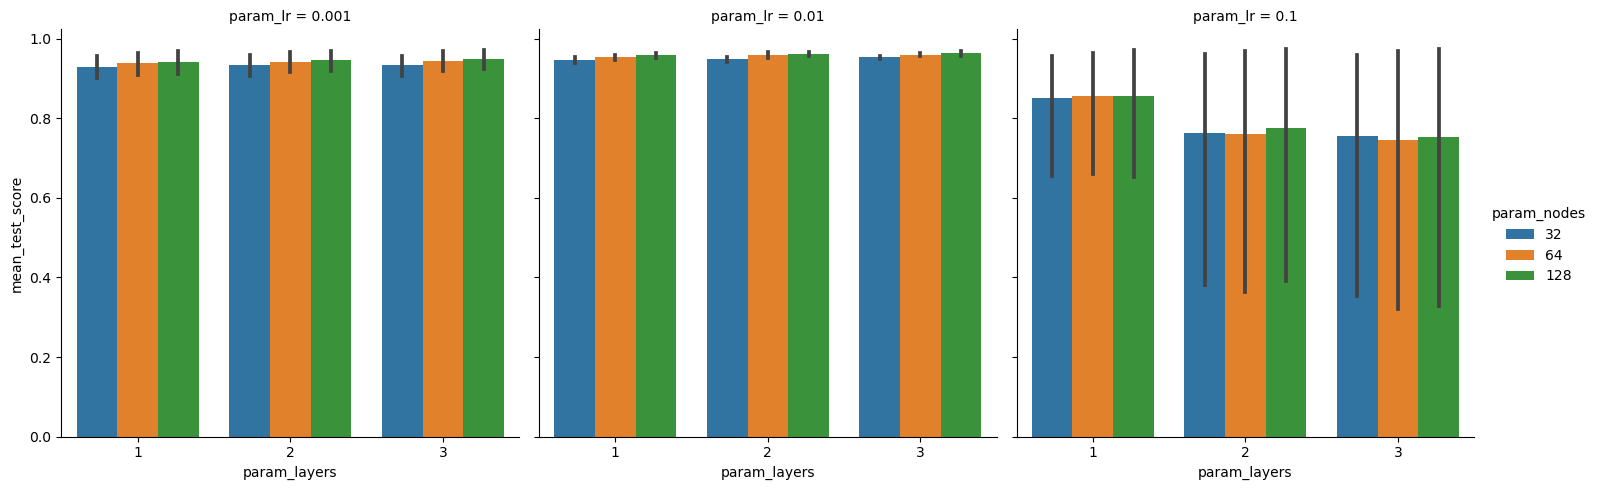

In [106]:
# Extract the results from the GridSearchCV object
results = pd.DataFrame(grid_result.cv_results_)

# Plot the hyperparameters vs the accuracies
sns.catplot(x='param_layers', y='mean_test_score', hue='param_nodes',
            col='param_lr', data=results, kind='bar')

## Train the best model

In [107]:
# implement checkpoints and early stopping to save the best model
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the callbacks
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with callbacks
best_model = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/Users/erictak/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9177 - val_loss: 0.1979 - val_accuracy: 0.9400
Epoch 2/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1758 - accuracy: 0.9490 - val_loss: 0.1780 - val_accuracy: 0.9494
Epoch 3/20
1313/1313 [==============================] - 1s 976us/step - loss: 0.1461 - accuracy: 0.9576 - val_loss: 0.1575 - val_accuracy: 0.9582
Epoch 4/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1346 - accuracy: 0.9610 - val_loss: 0.1636 - val_accuracy: 0.9585
Epoch 5/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1254 - accuracy: 0.9645 - val_loss: 0.1852 - val_accuracy: 0.9579
Epoch 6/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1185 - accuracy: 0.9668 - val_loss: 0.1864 - val_accuracy: 0.9562


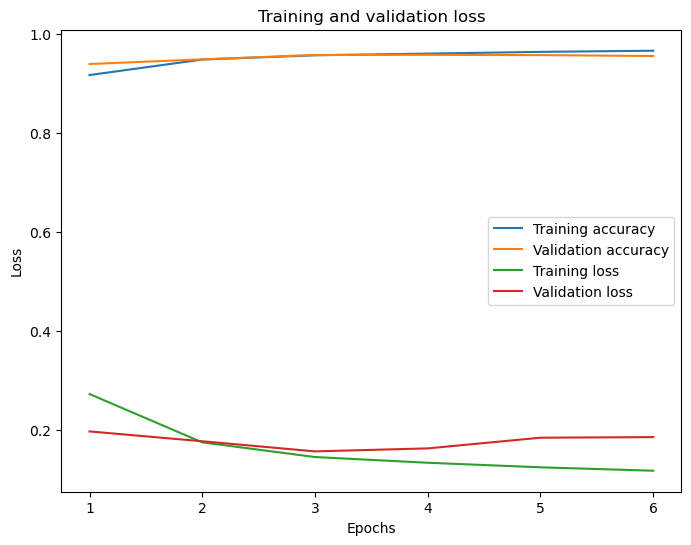

In [110]:
# Plot the training and validation metrics
plot_model(best_model)